In [148]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import setup_logging
from extract import MatchDataLoader
from transform import transform_tracking_to_long_format, get_possession_frames, analyze_block_by_ball_position

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Init logging
logger = setup_logging(log_file="../logs/dominance_analysis.log")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Load data

In [149]:
# Initialize data loader
loader = MatchDataLoader()

# Load all data
events_data, player_data, tracking_data, mapping_data = loader.load_all_data()

# Transform tracking data to long format
long_format_data = transform_tracking_to_long_format(tracking_data, events_data)

2025-11-11 01:35:23,754 - extract.data_loading - INFO - ✓ Loaded 1710 events from ../data/20251010-Belgium-North-Macedonia/events.json
2025-11-11 01:35:23,755 - extract.data_loading - INFO - ✓ Loaded 32 players from ../data/20251010-Belgium-North-Macedonia/events.json
2025-11-11 01:35:24,503 - extract.data_loading - INFO - ✓ Loaded 145567 tracking entries from ../data/20251010-Belgium-North-Macedonia/tracking.pkl
2025-11-11 01:35:24,505 - extract.data_loading - INFO - ✓ Loaded mapping data from ../data/20251010-Belgium-North-Macedonia/mapping.json
2025-11-11 01:35:24,658 - transform.long_format_tracking_data - INFO - First substitution timestamp: 1760124630570
2025-11-11 01:35:25,033 - transform.long_format_tracking_data - INFO - Kept 66904 filtered rows compared to original 145567 rows.


In [150]:
long_format_data.head()

,frame_id,period_id,timestamp,wall_clock,team_name,shirt_number,x,y,speed,last_touch
0,0,1,0.0,1760121954440,North Macedonia,10,2.36,-8.89,0.0,Belgium
1,0,1,0.0,1760121954440,North Macedonia,18,12.21,4.58,0.0,Belgium
2,0,1,0.0,1760121954440,North Macedonia,2,21.48,5.98,0.0,Belgium
3,0,1,0.0,1760121954440,North Macedonia,20,-0.08,9.08,0.0,Belgium
4,0,1,0.0,1760121954440,North Macedonia,21,15.56,-3.79,0.0,Belgium


In [151]:
# Get possession frames for Belgium
belgium_possession_frames = get_possession_frames(
    long_format_data,
    "Belgium"
)

belgium_possession_frames[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 2. Analyse defensive block

In [154]:
# Analyse defensive block
macedonia_block_analysis = analyze_block_by_ball_position(
    tracking_df=long_format_data,
    defending_team_name="North Macedonia",
    possession_frame_ids=belgium_possession_frames,
)

2025-11-11 01:38:48,368 - transform.block_by_ball_position - INFO - Processing 4731 sampled frames
2025-11-11 01:38:48,470 - transform.block_by_ball_position - INFO - Filtered tracking data from 1538792 to 108813 rows
2025-11-11 01:38:50,408 - transform.block_by_ball_position - INFO - Processed 1000/4731 frames
2025-11-11 01:38:52,206 - transform.block_by_ball_position - INFO - Processed 2000/4731 frames
2025-11-11 01:38:54,056 - transform.block_by_ball_position - INFO - Processed 3000/4731 frames
2025-11-11 01:38:55,850 - transform.block_by_ball_position - INFO - Processed 4000/4731 frames
2025-11-11 01:38:57,167 - transform.block_by_ball_position - INFO - Finished processing 4731 frames


In [155]:
macedonia_block_analysis["left_final_third"]

{'avg_positions':                       x          y
 shirt_number                      
 2             37.644133  12.581030
 3             37.017273  21.333067
 5             38.687248   4.751612
 6             38.556364  -0.363564
 7             31.749261  -0.463745
 8             37.623467  -7.661539
 10            23.870752   7.192824
 18            31.888521  18.383430
 20            23.996558   6.871988
 21            33.550630   9.622206
 23            50.253042   1.818800,
 'avg_compactness': {'area': 356.73561496969694,
  'vertical_spread': 18.82989090909091,
  'horizontal_spread': 31.416690909090907,
  'mean_x': 33.458420606060606,
  'mean_y': 7.224730909090909,
  'defensive_line': 39.945587878787876},
 'frame_count': 825}

# 3. Visualise block

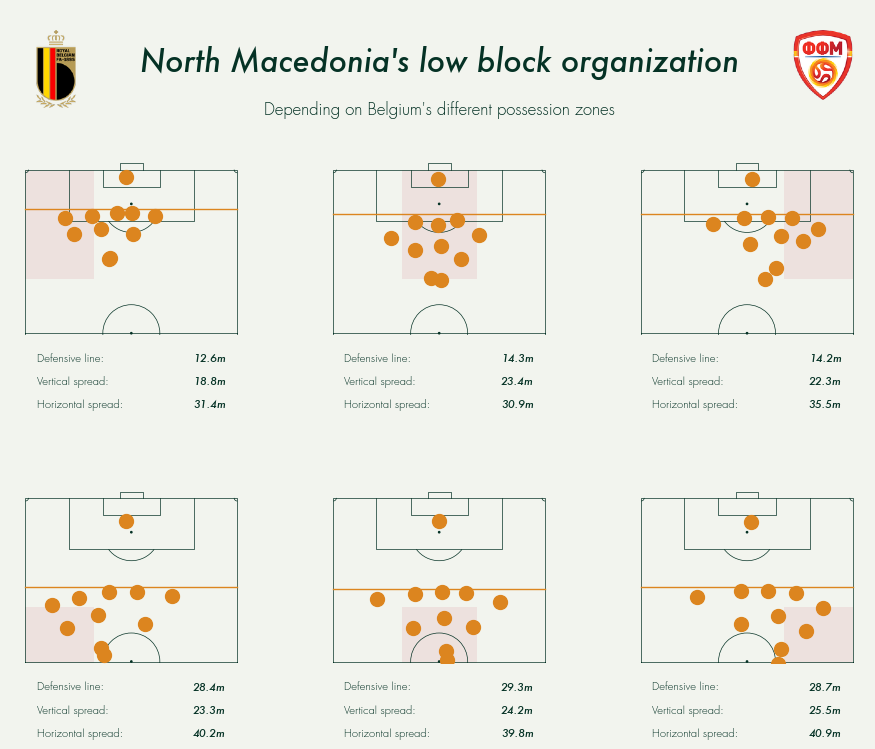

In [185]:
from viz import plot_defensive_blocks

fig = plot_defensive_blocks(macedonia_block_analysis, "North Macedonia", "Belgium")
fig.show()